# Ejercicio_1_Breast_Cancer

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score, mean_absolute_percentage_error

In [2]:
cancer = load_breast_cancer()

### EDA

In [3]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.insert(0, 'diagnosis', cancer.target)

In [4]:
df.tail()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,1,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [6]:
df.describe()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


+ Para la tabla anterior se hace comodo que las variables sean de tipo numerico(flaot64). Apreciamos el total de registros es de 569. \\
+ Distintas variables se comportan como floats entre 0 y 1.
+ Es interesante apreciar que variables como la mean area tiene una media bastante alta (654.889) y una desviacion estandar distante alta tambien (351.91)

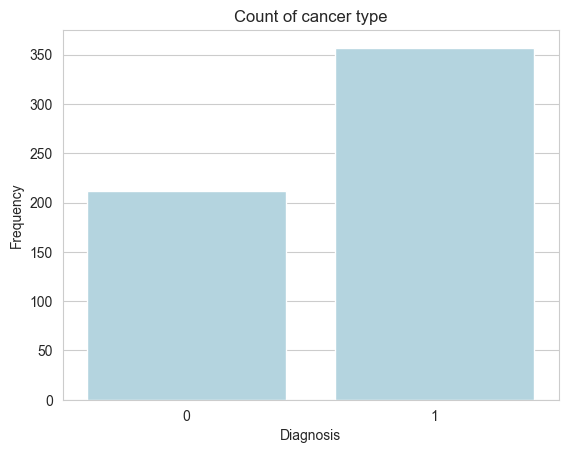

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.title('Count of cancer type')
sns.countplot(x=df.diagnosis, color = 'lightblue')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.show()

En este caso podemos apreciar como la variable 'Diagnosis' es una variable categorica representada en numeros, con un 0 como un diagnostico negrativo y 1 como uno positivo.

In [8]:
df.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Con ayuda de de la funcion ('isnull.sum()') de pandas apreciamos el conteo por columna de todos los datos faltantes del conjunto completo; Donde nos encontramos con un caso ideal donde *No* hay datos faltantes.

### Escalando Datos

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
scaler = MinMaxScaler().fit(X_train)

In [10]:
X_train_scaled = scaler.transform(X_train)
Knn = KNeighborsRegressor()
Knn.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(Knn.score(X_test_scaled, y_test)))

Test score: 0.85


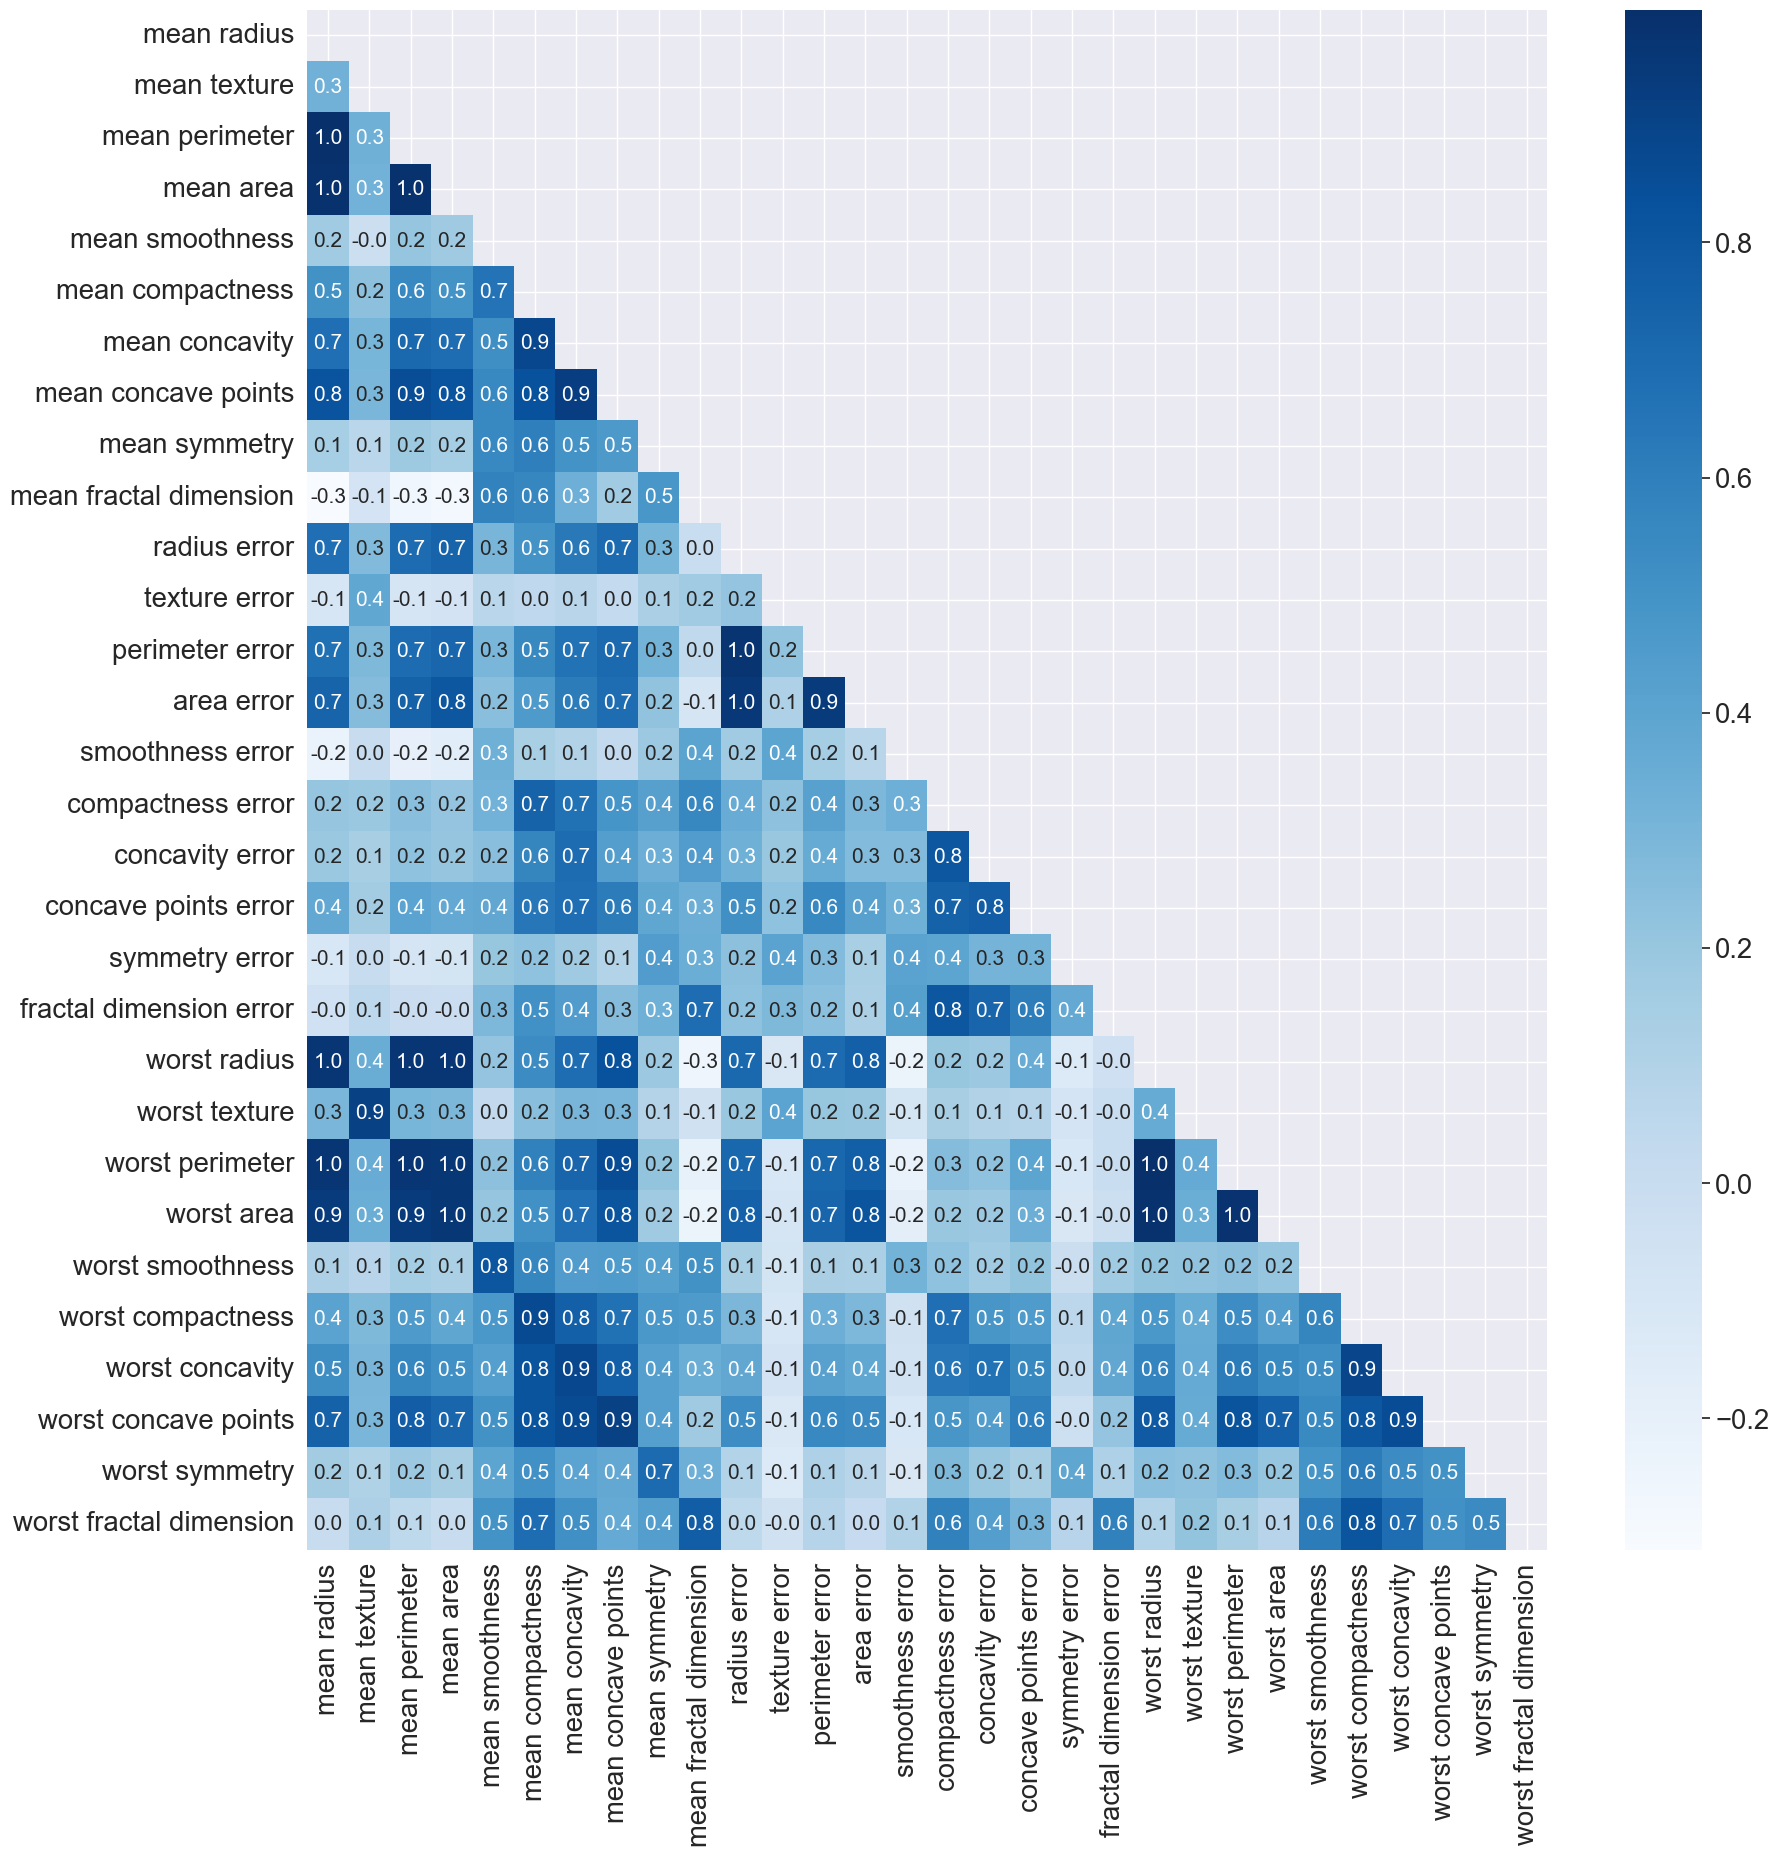

In [11]:
corr = df.iloc[:, 1:].corr()
corr.shape
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.8)
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, cbar=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues');

Claramente existen datos correlacionados con otros, lo que podemos apreciar por la fuerza del color azul presente en el recuadro, por ejemplo, las variables 'mean_radius' y 'worst_perimeter' poseen una correlacion de 1, estan totalmente relacionadas.

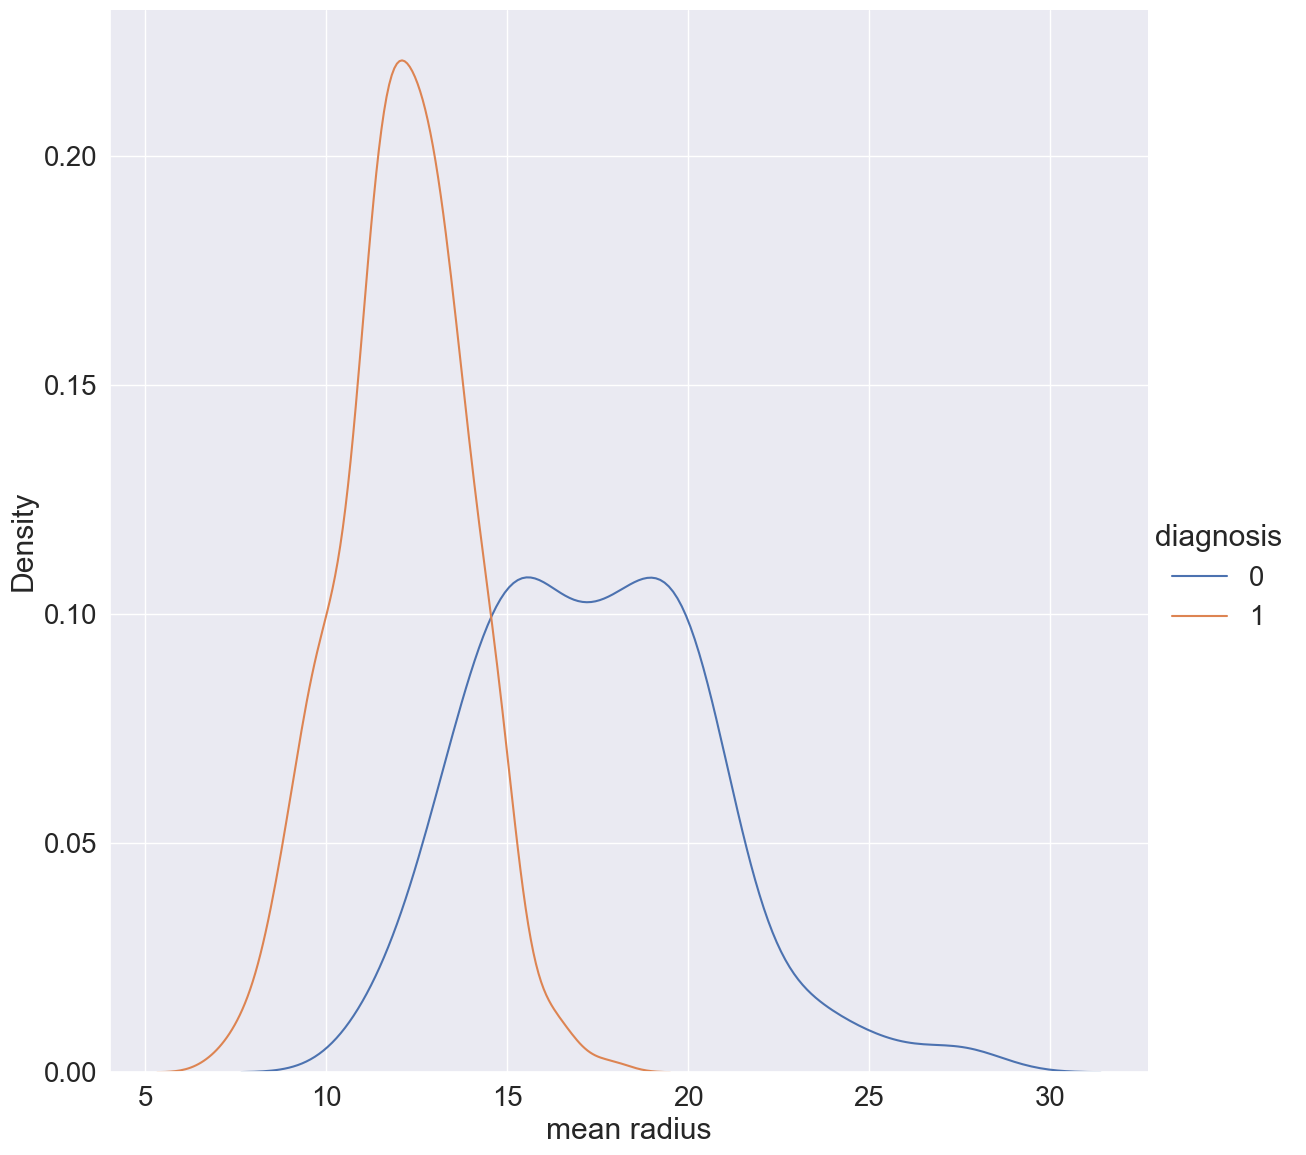

In [12]:
sns.FacetGrid(df, hue="diagnosis", height=12).map(sns.kdeplot, "mean radius").add_legend()

En este caso, observamos el comportamiento de la variable mean radius, dividida por el resultado de la variable diagnosis. Para el diagnóstico positivo, notamos un sesgo positivo, lo que indica un comportamiento alejado de una distribución normal. Para los diagnósticos negativos (0), la distribución presenta una mayor simetría y un sesgo menor, pero se diferencia de una distribución normal debido a su pico más achatado.

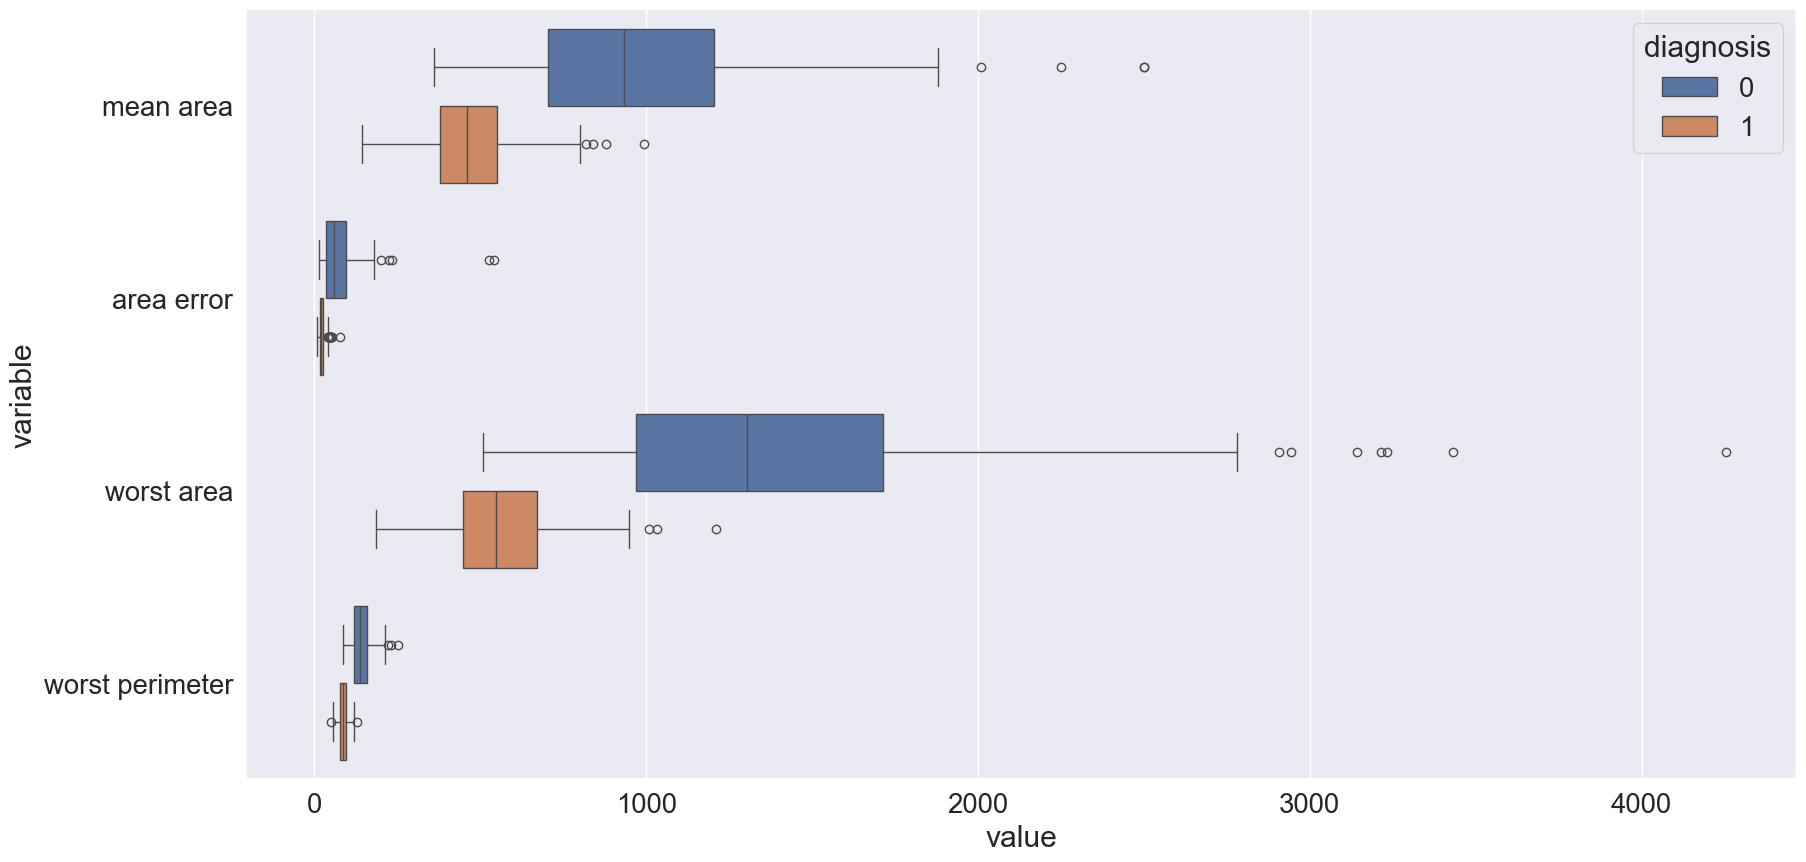

In [13]:
melted_data = pd.melt(df, id_vars = "diagnosis",value_vars = ['mean area', 'area error',
                                                              'worst area','worst perimeter'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="diagnosis",data= melted_data);

Dado que una visualización general dificulta apreciar correctamente las distintas variables, se realizó un acercamiento en aquellos parámetros que se comportan de manera similar, basándose en el rango de valores que toman; en donde todas las variables poseen valores atipicos, donde en la variable 'worst area' llegan a haber registros bastantes altos. Ademas, vemos como en estas variables los pares de cajas no se sobreponen entre si y la variabalidad de los datos.

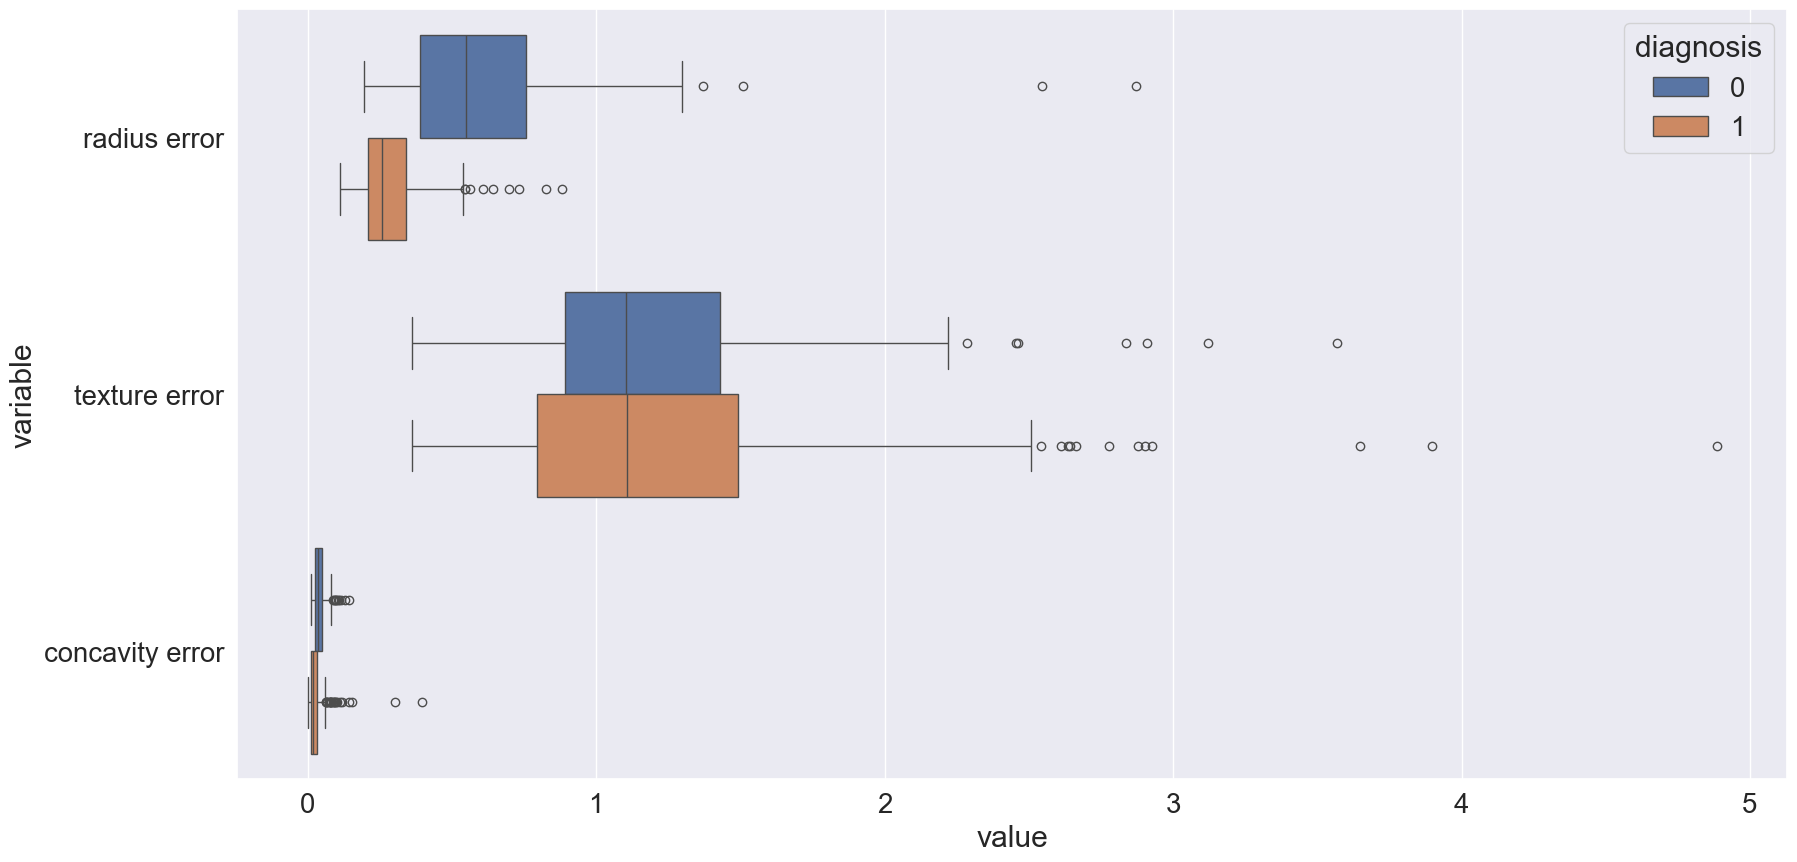

In [14]:
melted_data = pd.melt(df, id_vars = "diagnosis",value_vars = ['radius error',
                                                              'texture error', 'concavity error'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="diagnosis",data= melted_data);

Al igual que la perspectiva anterior, tenemos bastantes valores atipicos; un caso mas preciso puede ser el de la variable 'texture error', donde hay valores bastantes alejados que incluso podrian afectar a la distribucion del resto de los datos. Otro acercamiento a esta variable es como en estas cajas se superponen y presentan una mediana bastante similar.




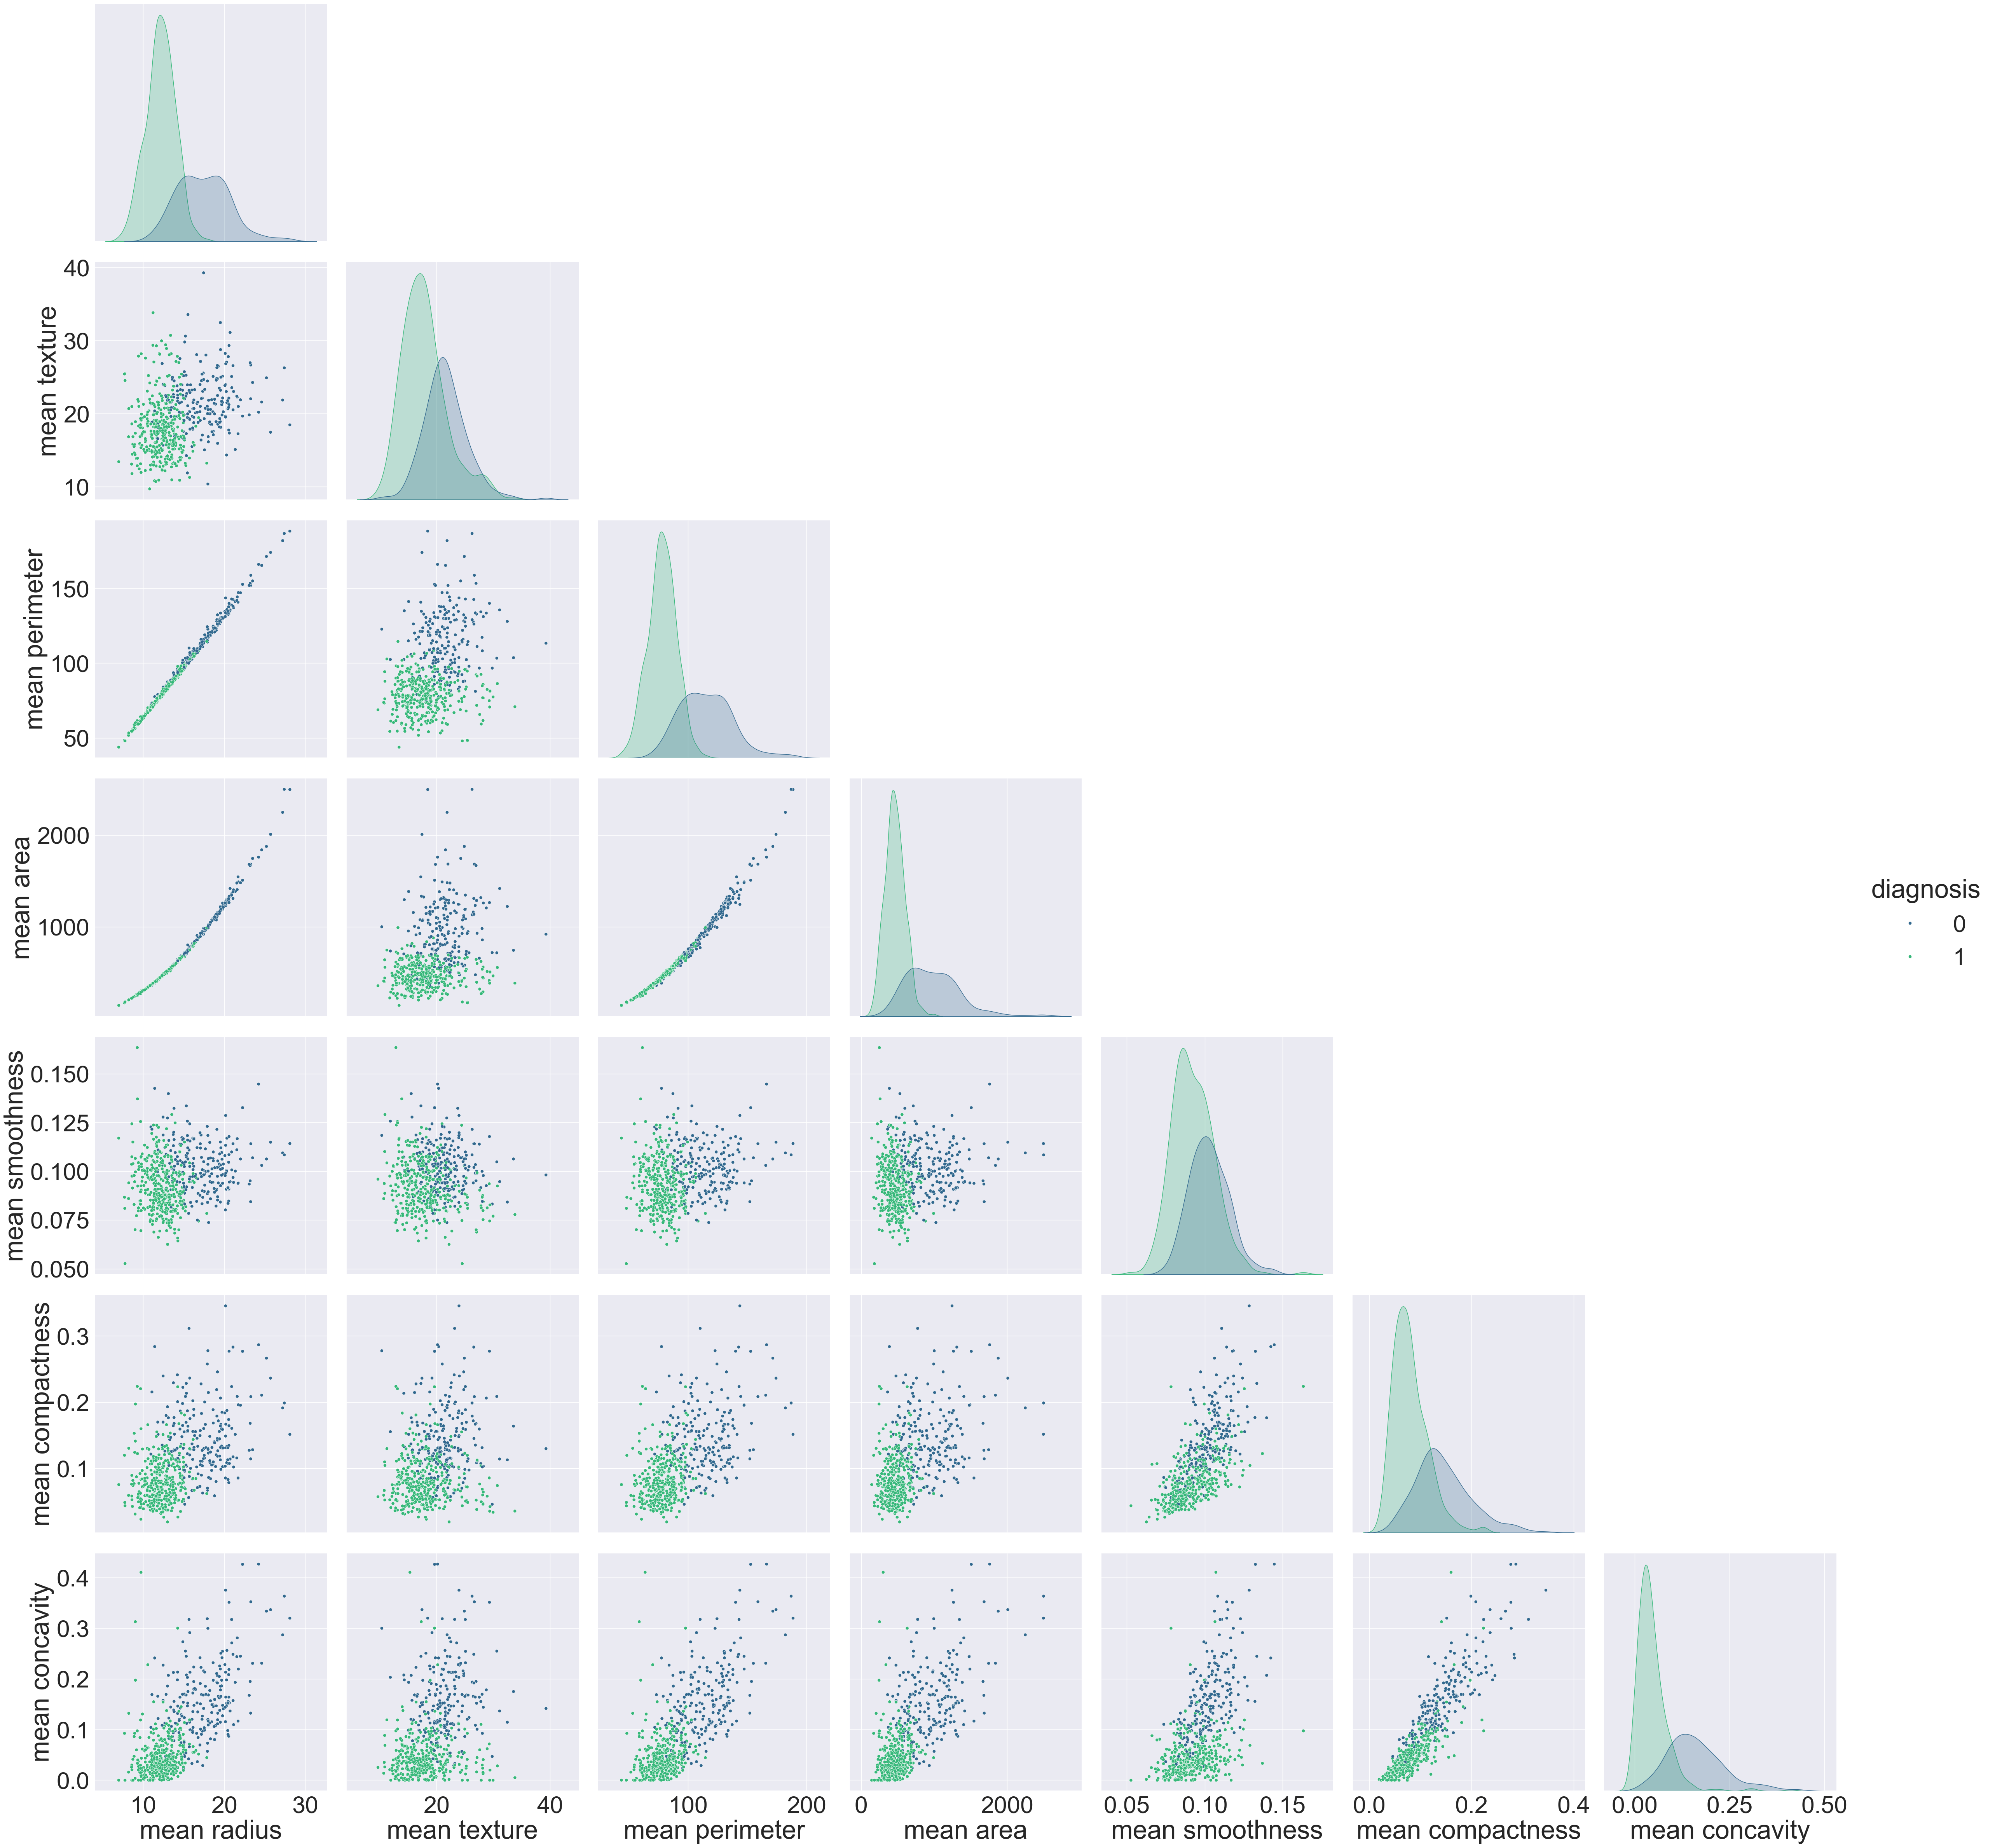

In [15]:
columns = ['diagnosis', 'mean radius', 'mean texture', 'mean perimeter',
           'mean area', 'mean smoothness', 'mean compactness', 'mean concavity']

sns.set(font_scale=4.0)
sns.pairplot(data=df[columns], hue="diagnosis", palette='viridis', corner=True, height=7.0, aspect=1.0)

En este caso, podemos encontrar una matriz que muestra gráficos de dispersión entre cada par de variables e histogramas de estas mismas variables. En los gráficos de dispersión, podemos observar que la variable 'mean area' tiene una relación completamente lineal con las variables 'mean radius' y 'mean perimeter'. Sin embargo, en los gráficos de distribución, las distribuciones no coinciden entre cada par de variables.

### Analisis de multicolinealidad


Para el analisis de la multicolinealidad tendremos en cuenta
$$VIF = \frac{1}{1-R^2}$$

+ Un valor VIF de 1: Sin multicolinealidad (variable perfectamente independiente).

+ Un valor VIF entre 1 y 5: Multicolinealidad baja a moderada (no se considera problemática).

+ Un valor VIF entre 5 y 10: Multicolinealidad moderada a alta (considerada problemática).

+ Un valor VIF superior a 10: Multicolinealidad alta (preocupación grave, requiere medidas).

$creditos \text{ } a \text{ } Profesor: \text{ } Lihki \text{ } Rubio \text{ } por \text{ } por \text{ } la \text{ } informacion $


In [16]:
def VIF_calculation(X):
    VIF = pd.DataFrame()
    VIF["variable"] = X.columns
    VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    VIF = VIF.sort_values('VIF', ascending=False).reset_index(drop = True)
    return(VIF)
def delete_multicollinearity(df, target_name, VIF_threshold):
  X = df.drop(target_name, axis=1)
  VIF_mat = VIF_calculation(X)
  n_VIF = VIF_mat["VIF"][0]
  if (n_VIF <= VIF_threshold):
    print("There is no multicollinearity!")
  else:
    while (n_VIF > VIF_threshold):
      X = X.drop(VIF_mat["variable"][0], axis=1)
      VIF_mat = VIF_calculation(X)
      n_VIF = VIF_mat["VIF"][0]
  display(VIF_mat)
  return X

In [17]:
df_copy = df.copy( )
df_copy = delete_multicollinearity(df_copy, "diagnosis", 10)

,variable,VIF
0,symmetry error,8.648328
1,smoothness error,8.347757
2,fractal dimension error,7.644681
3,texture error,7.103564
4,concavity error,6.666504
5,worst concavity,4.620458
6,area error,2.190762


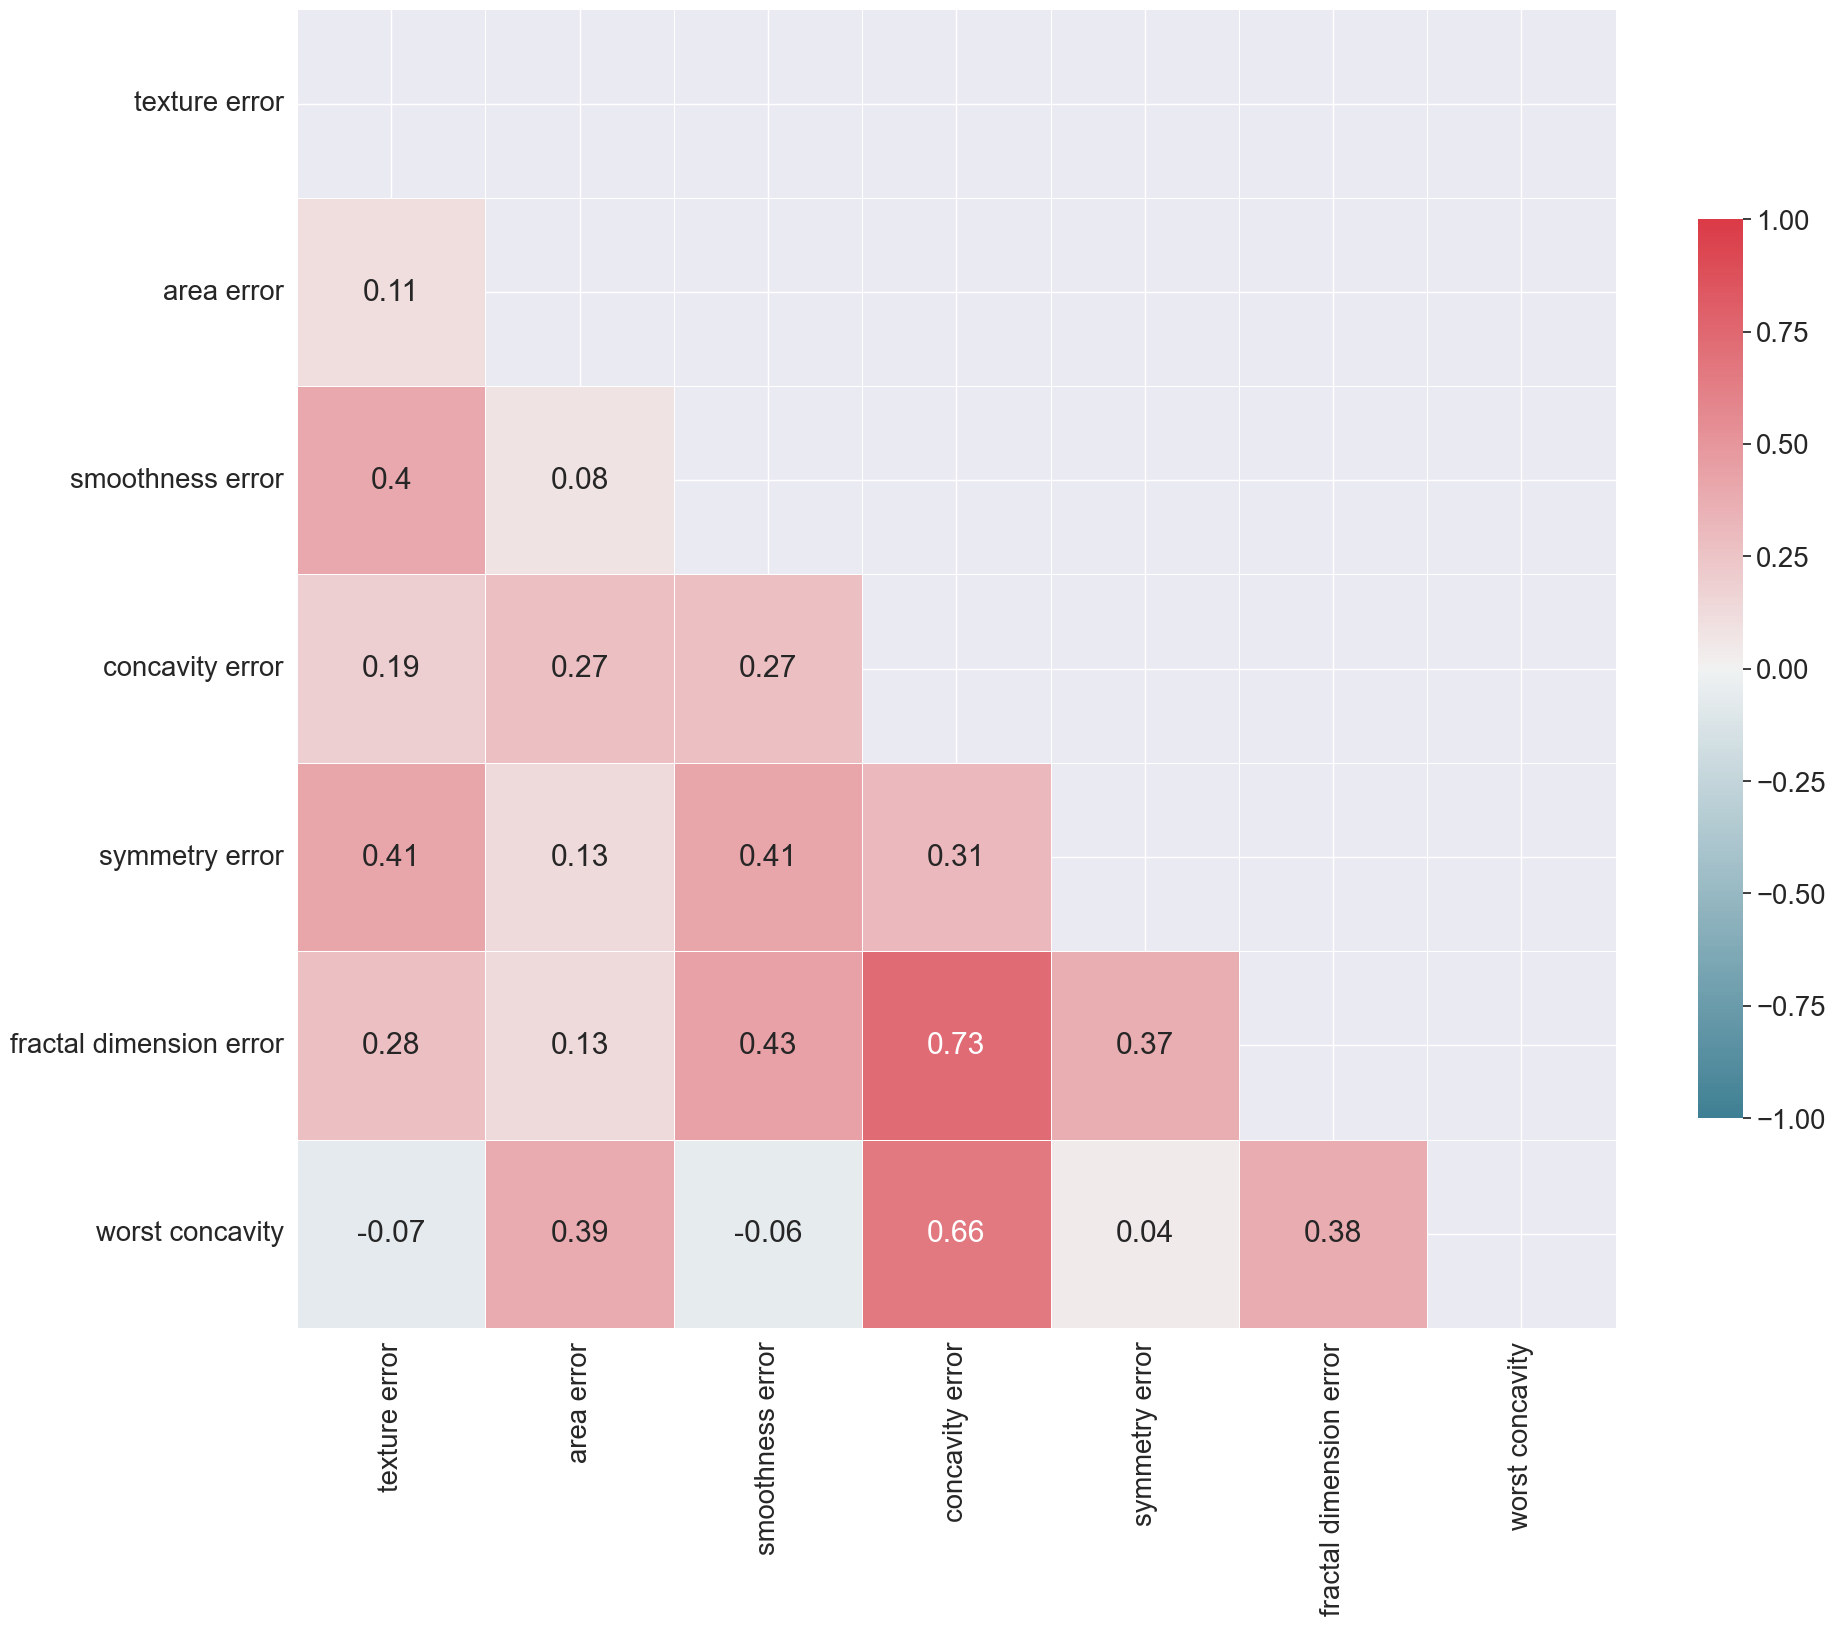

In [18]:
corr = df_copy.corr().round(2)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.8)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

### (i) Hiperparamtrizacion y validacion cruzada con GridSearchCV y Pipeline

### KNN

In [19]:
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],}

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=10)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

Antes de escalar los datos aplicamos GridSearch llamando la funcion 'GridSearchCV()', con esto realizamos el proceso de hiperparametrizacion y hallamos que el mejor parametro para el modelo knn seria de 6 vecinos, un modelo 7-nn, con un score mediano(0.73) y cross-validation mediano tambien(0.78) .

In [20]:
KNN = KNeighborsClassifier()
pipe = Pipeline([ ('scaler', MinMaxScaler()), ('knn', KNN) ])


In [21]:
param_grid = {'knn__n_neighbors': range(1, 20)}
grid_1 = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring = 'recall')
grid_1.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid_1.best_score_))
print("Best set score: {:.2f}".format(grid_1.score(X_test, y_test)))
print("Best parameters: ", grid_1.best_params_ )

Best cross-validation accuracy: 1.00
Best set score: 0.98
Best parameters:  {'knn__n_neighbors': 7}



Despues de realizar hiperparametrización
y validación cruzada usando GridSearchCV y Pipeline llegamos a un buen score(0.95) bastante alto, al igual para la cross-validation accuracy(1). Finalmente con un modelo k-nn de k == 7.

### Logistic

In [22]:
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline([ ('scaler', MinMaxScaler()), ('logistic', logistic) ])
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100]}
grid_2 = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring = 'recall')
grid_2.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid_2.best_score_))
print("Best set score: {:.2f}".format(grid_2.score(X_test, y_test)))
print("Best parameters: ", grid_2.best_params_ )

Best cross-validation accuracy: 1.00
Best set score: 1.00
Best parameters:  {'logistic__C': 0.01}


Para el caso del modelo ligistico, claramente cambiamos los parametros, teniendo la C en este caso, en lugar del numero de vecinos que se varian en un modelo knn. En consecuencia, obtenemos que el mejor parametro resulta c == 0.01, con un score llamativo(1
).

precision_score, recall_score, f1_score, roc_auc_score

In [23]:
knn_y_pred = grid_1.predict(X_test)
logistic_y_pred = grid_2.predict(X_test)

In [24]:
data = {
    'Modelo': ['Knn', 'Logistic'],
    'Precision': [
        precision_score(y_test, knn_y_pred),
        precision_score(y_test, logistic_y_pred)
    ],
    'Recall': [
        recall_score(y_test, knn_y_pred),
        recall_score(y_test, logistic_y_pred)
    ],
    'F1 Score': [
        f1_score(y_test, knn_y_pred),
        f1_score(y_test, logistic_y_pred)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, knn_y_pred),  # Recuerda que esto requiere las probabilidades
        roc_auc_score(y_test, logistic_y_pred)  # También aquí
    ]
}


Comparacion de metricas

In [25]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

,Modelo,Precision,Recall,F1 Score,ROC AUC
0,Knn,0.946237,0.977778,0.961749,0.941719
1,Logistic,0.647482,1.000000,0.786026,0.537736


Vemos que las metricas toman valroes distintos pero cercanos, todas mayores a, por ejemplo, 0.92.

### (ii) Hiperparamtrizacion y validacion cruzada con GridSearchCV y Pipeline con ciclo While y for

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score
import numpy as np

In [27]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=10)

### KNN con validacion cruzada e hiperparametrizacion iterativa

In [28]:
def func_cross_val_score(model, X_train, y_train, kf=None, scaler=None,train_list=[],test_list=[]):
    recall_scores = []
    f1_scores = []
    auc_scores = []
    precision_scores = []
    #precision_score, recall_score, f1_score, roc_auc_score
    if kf is None:
        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    if scaler is None:
        scaler = MinMaxScaler()
    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        X_train_fold = scaler.fit_transform(X_train_fold)
        X_val_fold = scaler.transform(X_val_fold)
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        recall = recall_score(y_val_fold, y_pred, average='macro')
        train_list.append(model.score(X_train_fold, y_train_fold))
        test_list.append(model.score(X_val_fold, y_val_fold))
        f1_scores.append(f1_score(y_val_fold,y_pred))
        auc_scores.append(roc_auc_score(y_val_fold,y_pred))
        precision_scores.append(precision_score(y_val_fold,y_pred))
        recall_scores.append(recall)
    mean_recall = np.mean(recall_scores)
    return mean_recall, np.mean(f1_scores), np.mean(auc_scores), np.mean(precision_scores), np.mean(train_list), np.mean(test_list)
recalls = []
k_recall =[[],[]]
results = [[],[]]
scores = [0,0,0]
best_recall = 0.0
best_k = None
range_neighbors = range(1, 21)
for k in range_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    recall, f1, auc, precission, score_train, score_test = func_cross_val_score(model=knn, X_train=X_train, y_train=y_train)
    if recall > best_recall:
        best_recall = recall
        scores[0] = f1
        scores[1] = auc
        scores[2] = precission
        best_k = k
    k_recall[0].append(k)
    k_recall[1].append(recall)
    results[0].append(score_train)
    results[1].append(score_test)
    recalls.append(recall)

print(f'Best Recall: {best_recall}, Best k: {best_k}')


Best Recall: 0.95524003347535, Best k: 6


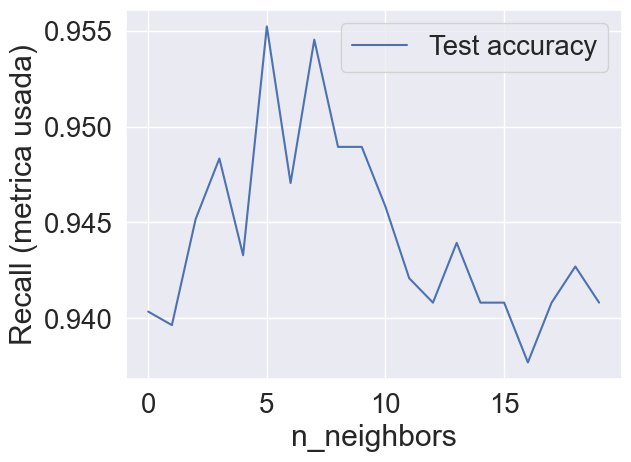

In [29]:
plt.plot( k_recall[1], label="Test accuracy")
plt.ylabel("Recall (metrica usada)")
plt.xlabel("n_neighbors")
plt.legend();

Para esta visualizacion tomamos como referencia el valor del recall, con respecto al numero de vecinos que considera el modelo. En adicion, es facil apreciar como en general hay un buen puntaje en el recall. Sin embargo, se puede decir que a medida que aumentan los vecinos el recall disminuye.

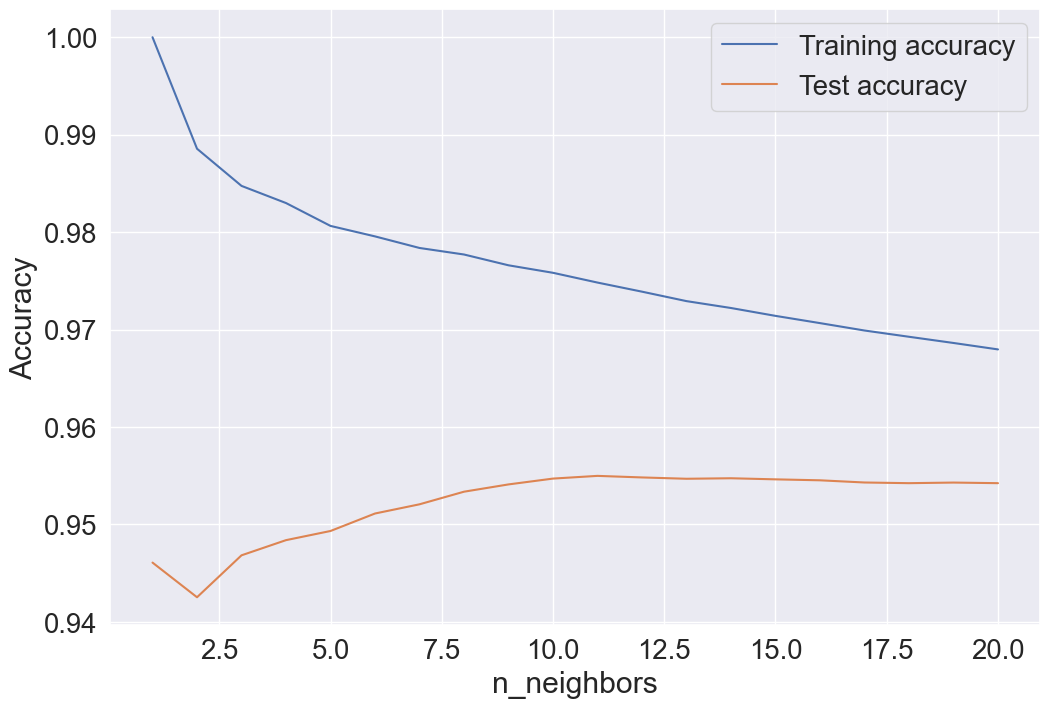

In [30]:
plt.figure(figsize=(12, 8))  # Cambia las dimensiones según prefieras

plt.plot(range_neighbors, results[0], label="Training accuracy")
plt.plot(range_neighbors, results[1], label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

Parece no tener mucha logica la grafica, sin embargo, es cuestion de escala; los valores de score entre el tarin y set estan bastante cerca, si nos vamos a sus puntajes reales. Apreciando el numero de vecinos escogido(6) vemos que hay una diferencia suficiente, de la mano del recall obtenido, que se apreciaba en la grafica anterior.

In [31]:
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline([ ('scaler', MinMaxScaler()), ('logistic', logistic) ])
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100]}

In [32]:
recalls2 = []
k_recall2 =[[],[]]
results2 = [[],[]]
scores2 = [0,0,0]
best_recall2 = 0.0
best_c = None

for c in [0.01, 0.1, 1, 10, 100]:
    logistic = LogisticRegression(C=c, max_iter=1000, tol=0.1)
    recall, f1, auc, precission, score_train, score_test = func_cross_val_score(model = logistic, X_train = X_train, y_train = y_train)
    if recall > best_recall2:
        best_recall = recall
        scores2[0] = f1
        scores2[1] = auc
        scores2[2] = precission
        best_c = c
    k_recall2[0].append(k)
    k_recall2[1].append(recall)
    results2[0].append(score_train)
    results2[1].append(score_test)
    recalls2.append(recall)

print(f'Best Recall: {best_recall}, Best k: {best_c}')

Best Recall: 0.5509072580645161, Best k: 100


In [33]:

data = {
    'Modelo': ['Knn', 'Logistic'],
    'Precision': [
        scores[2],
        scores2[2]
    ],
    'Recall': [
        best_recall,
        1
    ],
    'F1 Score': [
        scores[0],
        scores2[0]
    ],
    'ROC AUC': [
        scores[1],  # Recuerda que esto requiere las probabilidades
        scores2[1] # También aquí
    ]
}

df_scores = pd.DataFrame(data)

(df_scores).head()

,Modelo,Precision,Recall,F1 Score,ROC AUC
0,Knn,0.963747,0.550907,0.968006,0.955240
1,Logistic,0.652318,1.000000,0.789189,0.550907


Finalmente obtenemos las metricas obtenidas de ambos modelos, tanto el logistico como el knn. Aunque, no se obtuvieron los mismo resultados, son metricas bastantes similares a las obtenidas en la busqueda del mejor modelo con uso de gridsearch y pipeline.